In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
All_data = pd.read_pickle('tfa_working_ver_1')
All_data

,player_rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,...,turnovers,personal_fouls,points_per_game,year,salary,new_pos,team_id,team_points,team,team_rank
0,65,aaron brooks,PG,33,32,1,5.9,0.9,2.2,0.406,...,0.3,0.9,2.3,2018,2116955.0,back,MIN,0.573,Minnesota Timberwolves,13
1,179,aaron gordon,PF,22,58,57,32.9,6.5,14.9,0.434,...,1.8,1.9,17.6,2018,5504420.0,front,ORL,0.305,Orlando Magic,26
2,363,abdel nader,SF,24,48,1,10.9,1.0,3.1,0.336,...,0.7,0.9,3.0,2018,1167333.0,front,BOS,0.671,Boston Celtics,4
3,227,al horford,C,31,72,72,31.6,5.1,10.5,0.489,...,1.8,1.9,12.9,2018,27734405.0,front,BOS,0.671,Boston Celtics,4
4,250,al jefferson,C,33,36,1,13.4,3.1,5.8,0.534,...,0.6,1.8,7.0,2018,9769821.0,front,IND,0.585,Indiana Pacers,11
5,517,alan williams,PF,25,5,0,14.0,1.4,3.6,0.389,...,1.4,2.6,4.0,2018,6000000.0,front,PHO,0.256,Phoenix Suns,30
6,78,alec burks,SG,26,64,1,16.5,2.7,6.5,0.411,...,0.9,1.2,7.7,2018,10845506.0,back,UTA,0.585,Utah Jazz,9
7,1,alex abrines,SG,24,75,8,15.1,1.5,3.9,0.395,...,0.3,1.7,4.7,2018,5725000.0,back,OKC,0.585,Oklahoma City Thunder,8
8,292,alex len,C,24,69,13,20.2,3.1,5.5,0.566,...,1.1,2.3,8.5,2018,4187599.0,front,PHO,0.256,Phoenix Suns,30
9,11,alfarouq aminu,PF,27,69,67,30.0,3.3,8.4,0.395,...,1.1,2.0,9.3,2018,7319035.0,front,POR,0.598,Portland Trail Blazers,7


In [3]:
list(All_data.columns.values)

['player_rank',
 'player',
 'pos',
 'age',
 'games',
 'games_started',
 'min_per_game',
 'field_goals',
 'field_goals_attempts',
 'field_goals_pct',
 '3points',
 '3points_attempts',
 '3points_pct',
 '2points',
 '2points_attempts',
 '2points_pct',
 'efg_pct',
 'free_throws',
 'free_throws_attempts',
 'free_throws_pct',
 'orb',
 'drb',
 'trb',
 'assists',
 'steals',
 'blocks',
 'turnovers',
 'personal_fouls',
 'points_per_game',
 'year',
 'salary',
 'new_pos',
 'team_id',
 'team_points',
 'team',
 'team_rank']

In [2]:
All_data
All_data['Position_back']=np.where((All_data['new_pos']=='back'),1,0)
All_data['Position_front']=np.where((All_data['new_pos']=='front'),1,0)
All_data[All_data['new_pos']=='special']

# X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
#               '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
#               'turnovers', 'personal_fouls', 'points_per_game', 'team_points']] 
# import seaborn as sb
# sb.pairplot(X)

,player_rank,player,pos,age,games,games_started,min_per_game,field_goals,field_goals_attempts,field_goals_pct,...,points_per_game,year,salary,new_pos,team_id,team_points,team,team_rank,Position_back,Position_front
62,63,corey brewer,SF-SG,31,72,18,16.8,2.0,4.4,0.449,...,5.3,2018,7579366.0,special,LAL,0.427,Los Angeles Lakers,21,0,0
375,358,shabazz muhammad,SF-SG,25,43,2,9.7,2.0,4.4,0.447,...,5.0,2018,1577230.0,special,MIN,0.573,Minnesota Timberwolves,13,0,0


In [64]:
# Linear regression on variables with no missing values
# Note that some columns have missing values 
# '3points_pct', '2points_pct', 'efg_pct', 'personal_fouls'

import statsmodels.api as sm

X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              '3points', '3points_attempts',  'free_throws', 'orb','drb', 'trb', 'assists', 'steals', 'blocks','free_throws_attempts', \
              'turnovers', 'personal_fouls', 'points_per_game', 'team_points']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     26.13
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           2.71e-65
Time:                        13:49:40   Log-Likelihood:                -7549.9
No. Observations:                 449   AIC:                         1.515e+04
Df Residuals:                     426   BIC:                         1.524e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.214e+07   1.88e+06     -6.465      0.000   -1.58e+07   -8.45e+06
age                   5.119e+05   5.67e+04      9.028      0.000       4e+05    6.23e+05
games                -7.464e+04   1.41e+04     -5.302      0.000   -1.02e+05    -4.7e+04
games_started          7.23e+04   1.48e+04      4.874      0.000    4.31e+04    1.01e+05
min_per_game           8.79e+04   9.95e+04      0.883      0.378   -1.08e+05    2.84e+05
field_goals            1.12e+07    7.9e+06      1.417      0.157   -4.33e+06    2.67e+07
field_goals_attempts -3.187e+04   5.08e+06     -0.006      0.995      -1e+07    9.96e+06
2points              -9.358e+06    5.6e+06     -1.671      0.096   -2.04e+07    1.65e+06
2points_attempts     -8.188e+05   5.04e+06     -0.162      0.871   -1.07e+07    9.09e+06
3points              -1.243e+07   6.97e+06     -1.782      0.075   -2.61e+07    1.28e+06
3points_attempts      1.065e+06   5.09e+06      0.209      0.834   -8.94e+06    1.11e+07
free_throws           3.921e+05   3.46e+06      0.113      0.910   -6.41e+06     7.2e+06
orb                  -5.105e+06   5.03e+06     -1.015      0.311    -1.5e+07    4.78e+06
drb                  -6.252e+06   4.96e+06     -1.260      0.208    -1.6e+07     3.5e+06
trb                   6.493e+06   4.95e+06      1.311      0.190   -3.24e+06    1.62e+07
assists               6.569e+05   3.02e+05      2.173      0.030    6.28e+04    1.25e+06
steals               -3.001e+05   8.95e+05     -0.335      0.738   -2.06e+06    1.46e+06
blocks                5.862e+05   9.18e+05      0.638      0.524   -1.22e+06    2.39e+06
free_throws_attempts  7.977e+05    1.1e+06      0.726      0.468   -1.36e+06    2.96e+06
turnovers            -1.589e+06   8.87e+05     -1.791      0.074   -3.33e+06    1.55e+05
personal_fouls       -8.489e+05   6.25e+05     -1.358      0.175   -2.08e+06     3.8e+05
points_per_game       5.216e+04   3.36e+06      0.016      0.988   -6.54e+06    6.65e+06
team_points           4.014e+06   1.71e+06      2.342      0.020    6.45e+05    7.38e+06
==============================================================================
Omnibus:                       33.986   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.287
Skew:                           0.496   Prob(JB):                     2.20e-13
Kurtosis:                       4.459   Cond. No.                     3.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Linear regression on variables taken from Ankit...I don't fully understand the selection process yet

import statsmodels.api as sm

X = All_data[['age', 'games', 'games_started', 'min_per_game', 'field_goals', 'field_goals_attempts', '2points', '2points_attempts', \
              'free_throws', 'free_throws_attempts', 'turnovers', 'points_per_game','Position_back','Position_front']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     38.13
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           1.22e-66
Time:                        20:56:14   Log-Likelihood:                -7561.6
No. Observations:                 449   AIC:                         1.515e+04
Df Residuals:                     434   BIC:                         1.521e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.148e+07   4.01e+06     -2.863      0.004   -1.94e+07    -3.6e+06
age                   5.391e+05   5.65e+04      9.539      0.000    4.28e+05     6.5e+05
games                -7.155e+04   1.41e+04     -5.091      0.000   -9.92e+04   -4.39e+04
games_started         7.947e+04    1.5e+04      5.301      0.000       5e+04    1.09e+05
min_per_game          1.002e+05   8.18e+04      1.226      0.221   -6.05e+04    2.61e+05
field_goals           1.334e+07   7.93e+06      1.681      0.093   -2.26e+06    2.89e+07
field_goals_attempts  5.511e+05   7.35e+05      0.750      0.454   -8.94e+05       2e+06
2points              -1.359e+06   3.07e+06     -0.443      0.658   -7.39e+06    4.67e+06
2points_attempts     -1.881e+06   9.32e+05     -2.019      0.044   -3.71e+06   -4.97e+04
free_throws           4.151e+06   2.94e+06      1.411      0.159   -1.63e+06    9.93e+06
free_throws_attempts   1.63e+06   1.05e+06      1.553      0.121   -4.33e+05    3.69e+06
turnovers            -5.822e+05   6.18e+05     -0.942      0.347    -1.8e+06    6.32e+05
points_per_game      -4.512e+06   2.74e+06     -1.648      0.100   -9.89e+06    8.68e+05
Position_back         1.024e+05   3.65e+06      0.028      0.978   -7.08e+06    7.28e+06
Position_front        5.853e+05   3.63e+06      0.161      0.872   -6.55e+06    7.72e+06
==============================================================================
Omnibus:                       32.199   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.305
Skew:                           0.528   Prob(JB):                     5.34e-11
Kurtosis:                       4.189   Cond. No.                     2.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Linear regression on variables that I think are good ones qualitatively


import statsmodels.api as sm

X = All_data[['age', 'games', 'games_started', 'min_per_game', '3points', 'field_goals', 'orb', \
              'free_throws_attempts', 'blocks', 'points_per_game','Position_back','Position_front','min_per_game','personal_fouls']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     41.03
Date:                Wed, 28 Nov 2018   Prob (F-statistic):           2.64e-67
Time:                        21:48:28   Log-Likelihood:                -7562.0
No. Observations:                 449   AIC:                         1.515e+04
Df Residuals:                     435   BIC:                         1.521e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.086e+07   3.98e+06     -2.727      0.007   -1.87e+07   -3.03e+06
age                   5.519e+05   5.58e+04      9.898      0.000    4.42e+05    6.62e+05
games                -6.107e+04   1.35e+04     -4.517      0.000   -8.76e+04   -3.45e+04
games_started         7.349e+04    1.5e+04      4.887      0.000    4.39e+04    1.03e+05
min_per_game          4.878e+04    4.4e+04      1.108      0.269   -3.78e+04    1.35e+05
3points               1.241e+06   1.45e+06      0.855      0.393   -1.61e+06    4.09e+06
field_goals           5.396e+05    2.5e+06      0.216      0.829   -4.37e+06    5.45e+06
orb                   1.398e+06   5.65e+05      2.473      0.014    2.87e+05    2.51e+06
free_throws_attempts  1.239e+06   1.04e+06      1.191      0.234   -8.06e+05    3.28e+06
blocks                6.821e+05   8.85e+05      0.770      0.441   -1.06e+06    2.42e+06
points_per_game      -1.009e+05   1.23e+06     -0.082      0.934   -2.51e+06    2.31e+06
Position_back        -6.795e+05   3.63e+06     -0.187      0.852   -7.81e+06    6.45e+06
Position_front       -1.361e+05   3.62e+06     -0.038      0.970   -7.26e+06    6.99e+06
min_per_game          4.878e+04    4.4e+04      1.108      0.269   -3.78e+04    1.35e+05
personal_fouls       -1.447e+06   5.66e+05     -2.556      0.011   -2.56e+06   -3.34e+05
==============================================================================
Omnibus:                       43.749   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.531
Skew:                           0.580   Prob(JB):                     7.27e-19
Kurtosis:                       4.766   Cond. No.                     2.81e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
from sklearn.model_selection import train_test_split

# Specify the features of interest and the target

# Extract the instances and target
X = All_data[['age', 'games', 'games_started', 'min_per_game', '3points', 'field_goals', 'orb', \
              'free_throws_attempts', 'blocks', 'points_per_game','Position_back','Position_front','min_per_game','personal_fouls']]  
y = All_data['salary'] 

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
#pip install yellowbrick
#python -m pip install yellowbrick
! pip install -U yellowbrick

Requirement not upgraded as not directly required: matplotlib<3.0,>=1.5.1 in c:\users\ashish\anaconda3\lib\site-packages (from yellowbrick) (2.2.2)
Requirement not upgraded as not directly required: numpy>=1.13.0 in c:\users\ashish\anaconda3\lib\site-packages (from yellowbrick) (1.14.3)
Requirement not upgraded as not directly required: scipy>=1.0.0 in c:\users\ashish\anaconda3\lib\site-packages (from yellowbrick) (1.1.0)
Requirement not upgraded as not directly required: cycler>=0.10.0 in c:\users\ashish\anaconda3\lib\site-packages (from yellowbrick) (0.10.0)
Requirement not upgraded as not directly required: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in c:\users\ashish\anaconda3\lib\site-packages (from matplotlib<3.0,>=1.5.1->yellowbrick) (2.2.0)
Requirement not upgraded as not directly required: python-dateutil>=2.1 in c:\users\ashish\anaconda3\lib\site-packages (from matplotlib<3.0,>=1.5.1->yellowbrick) (2.7.3)
Requirement not upgraded as not directly required: pytz in c:\users\ashis

distributed 1.21.8 requires msgpack, which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Ashish\\AppData\\Local\\Temp\\pip-uninstall-v5gipw4g\\users\\ashish\\anaconda3\\lib\\site-packages\\sklearn\\linear_model\\cd_fast.cp36-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
#!python -m pip install --upgrade pip
!conda install -c districtdatalabs yellowbrick

In [22]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

ModuleNotFoundError: No module named 'yellowbrick'

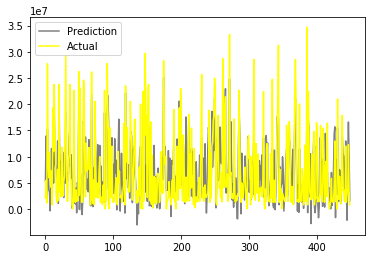

In [12]:
import matplotlib.pyplot as plt 
k=predictions.astype(int)
plt.plot(k ,label = "Prediction",color='grey')
plt.plot(y ,label='Actual',color='yellow')
plt.legend() 

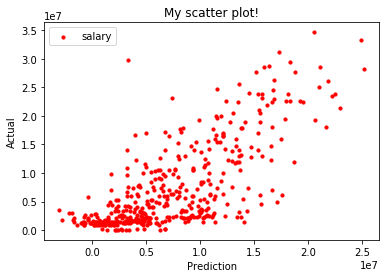

In [17]:
plt.scatter(k,y,label = "salary",color='red',s=10)
# x-axis label 
plt.xlabel('Prediction') 
# frequency label 
plt.ylabel('Actual') 
# plot title 
plt.title('My scatter plot!') 
# showing legend 
plt.legend() 

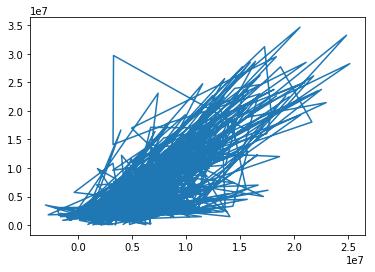

In [19]:
plt.plot(k, y) 

In [67]:
# Linear regression on variables that are significant on 10% level from the first regression

import statsmodels.api as sm

X = All_data[['age', 'games', 'games_started', '2points', '3points', 'trb', 'assists', \
              'turnovers', 'personal_fouls', 'team_points']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     52.96
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           3.78e-69
Time:                        14:15:08   Log-Likelihood:                -7563.7
No. Observations:                 449   AIC:                         1.515e+04
Df Residuals:                     438   BIC:                         1.519e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.265e+07   1.78e+06     -7.096      0.000   -1.62e+07   -9.15e+06
age             5.228e+05    5.6e+04      9.329      0.000    4.13e+05    6.33e+05
games          -7.462e+04   1.35e+04     -5.512      0.000   -1.01e+05    -4.8e+04
games_started   6.904e+04   1.39e+04      4.973      0.000    4.18e+04    9.63e+04
2points         1.193e+06   2.81e+05      4.251      0.000    6.41e+05    1.74e+06
3points         1.837e+06   3.91e+05      4.704      0.000    1.07e+06     2.6e+06
trb              7.62e+05   1.72e+05      4.431      0.000    4.24e+05     1.1e+06
assists         5.602e+05   2.81e+05      1.997      0.046    8779.320    1.11e+06
turnovers      -9.586e+05   8.41e+05     -1.139      0.255   -2.61e+06    6.95e+05
personal_fouls -7.904e+05   5.63e+05     -1.403      0.161    -1.9e+06    3.17e+05
team_points     4.693e+06   1.66e+06      2.830      0.005    1.43e+06    7.95e+06
==============================================================================
Omnibus:                       34.094   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.604
Skew:                           0.497   Prob(JB):                     1.88e-13
Kurtosis:                       4.464   Cond. No.                         624.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
import statsmodels.api as sm

X = All_data[['assists', 'personal_fouls', 'points_per_game']]  ## independent variables

y = All_data['salary']  ## Dependent variable
X = sm.add_constant(X)  ## let's add an intercept (beta_0) to our model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     86.21
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           5.48e-44
Time:                        18:43:38   Log-Likelihood:                -7638.8
No. Observations:                 449   AIC:                         1.529e+04
Df Residuals:                     445   BIC:                         1.530e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.654e+05   7.49e+05      1.022      0.307   -7.07e+05    2.24e+06
assists          2.313e+05   2.17e+05      1.065      0.288   -1.96e+05    6.58e+05
personal_fouls  -3.951e+05   4.96e+05     -0.796      0.426   -1.37e+06     5.8e+05
points_per_game   7.34e+05   7.36e+04      9.976      0.000    5.89e+05    8.79e+05
==============================================================================
Omnibus:                       54.805   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.394
Skew:                           0.820   Prob(JB):                     3.49e-18
Kurtosis:                       4.269   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""